In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [169]:
data=sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

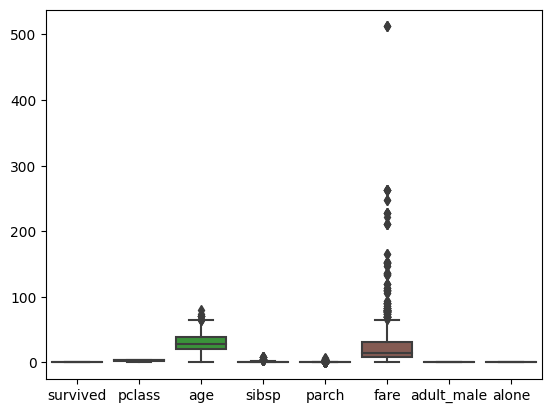

In [170]:
plt.plot(figsize=(12,12))
sns.boxplot(data)

<Axes: >

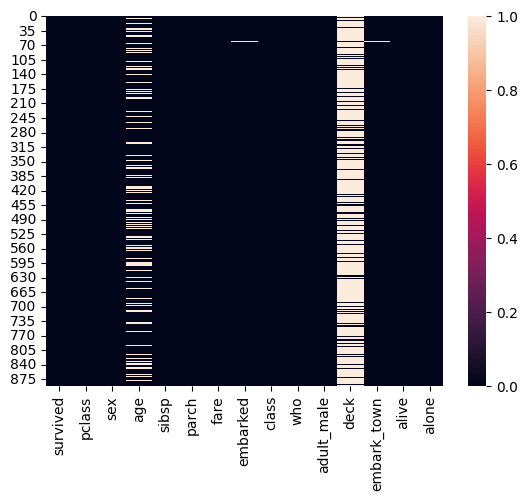

In [171]:
sns.heatmap(data.isnull())

In [172]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [173]:
median=data["age"].median()
mode1=data[data["embarked"].notna()]["embarked"].mode()[0]
mode2=data[data["deck"].notna()]["deck"].mode()[0]
mode3=data[data["embark_town"].notna()]["embark_town"].mode()[0]
data["age_median"]=data["age"].fillna(median)
data["embarked_median"]=data["embarked"].fillna(mode1)
data["deck_median"]=data["deck"].fillna(mode2)
data["embark_town_median"]=data["embark_town"].fillna(mode3)

df=data.drop(["age","embarked","deck","embark_town"],axis=1)

In [174]:
df.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone,age_median,embarked_median,deck_median,embark_town_median
0,0,3,male,1,0,7.2500,Third,man,True,no,False,22.0,S,C,Southampton
1,1,1,female,1,0,71.2833,First,woman,False,yes,False,38.0,C,C,Cherbourg
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True,26.0,S,C,Southampton
3,1,1,female,1,0,53.1000,First,woman,False,yes,False,35.0,S,C,Southampton
4,0,3,male,0,0,8.0500,Third,man,True,no,True,35.0,S,C,Southampton


<Axes: >

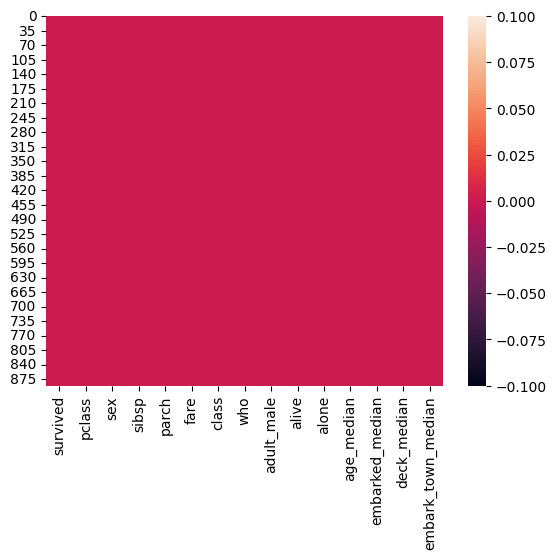

In [175]:
sns.heatmap(df.isnull())

In [176]:
df["embark_town_median"].value_counts()

embark_town_median
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

encoding :-

In [177]:
df.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone,age_median,embarked_median,deck_median,embark_town_median
0,0,3,male,1,0,7.2500,Third,man,True,no,False,22.0,S,C,Southampton
1,1,1,female,1,0,71.2833,First,woman,False,yes,False,38.0,C,C,Cherbourg
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True,26.0,S,C,Southampton
3,1,1,female,1,0,53.1000,First,woman,False,yes,False,35.0,S,C,Southampton
4,0,3,male,0,0,8.0500,Third,man,True,no,True,35.0,S,C,Southampton


In [178]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
df["encoded_sex"]=encoder.fit_transform(df[["sex"]])#
df["encoded_adult_male"]=encoder.fit_transform(df[["adult_male"]])#
df["encoded_alive"]=encoder.fit_transform(df[["alive"]])#
df["encoded_alone"]=encoder.fit_transform(df[["alone"]])#
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoded1=encoder.fit_transform(df[["class"]])
encoded_class1=pd.DataFrame(encoded1,columns=encoder.get_feature_names_out(["class"]))#
df=pd.concat([df,encoded_class1],axis=1)

encoded2=encoder.fit_transform(df[["who"]])
encoded_class2=pd.DataFrame(encoded2,columns=encoder.get_feature_names_out(["who"]))#

df=pd.concat([df,encoded_class2],axis=1)


from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["encoded_deck_median"]=encoder.fit_transform(df[["deck_median"]])
df["encoded_embarked_median"]=encoder.fit_transform(df[["embarked_median"]])
df["encoded_embark_town_median"]=encoder.fit_transform(df[["embark_town_median"]])


new_df=df.drop(["sex","class","who","adult_male","alive","alone","embarked_median","deck_median","embark_town_median"],axis=1)
new_df.head()

,survived,pclass,sibsp,parch,fare,age_median,encoded_sex,encoded_adult_male,encoded_alive,encoded_alone,class_First,class_Second,class_Third,who_child,who_man,who_woman,encoded_deck_median,encoded_embarked_median,encoded_embark_town_median
0,0,3,1,0,7.2500,22.0,1,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,2,2,2
1,1,1,1,0,71.2833,38.0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,2,0,0
2,1,3,0,0,7.9250,26.0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,2,2,2
3,1,1,1,0,53.1000,35.0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,2,2,2
4,0,3,0,0,8.0500,35.0,1,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,2,2,2


In [179]:
new_df.shape

(891, 19)

In [180]:
x=new_df.drop(["survived"],axis=1)
y=new_df["survived"]

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [182]:
x_train.shape

(712, 18)

In [183]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [184]:
y_train_pred=model.predict(x_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [185]:
y_test_pred=model.predict(x_test)
y_test_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
print("Training accuracy:", accuracy_score(y_train,y_train_pred))

Training accuracy: 1.0


In [188]:
print("Testing accuracy:",accuracy_score(y_test,y_test_pred))

Testing accuracy: 1.0


In [189]:
new_df.shape

(891, 19)

In [190]:
input_data=[[1,1,0,71.2833,38.0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,2,0,0]]
prediction=model.predict(input_data)